# Part I: Line & Circle Detection

In [434]:
# %matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

### Helper Functions

In [435]:
def show(image, title ="", size = 15):
    width, height = image.shape[0], image.shape[1]
    aspect_ratio = width/height
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

### 1 -	Open ‘Street.jpg’ and convert it to grayscale

In [446]:
street_img = cv.imread('Assignment3_Files/Street.jpg')

assert street_img is not None, 'Image not found'

gray_street_img = cv.cvtColor(street_img, cv.COLOR_BGR2GRAY)


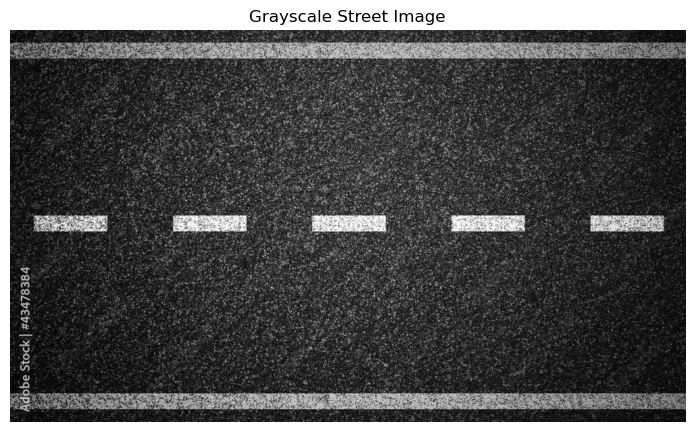

In [437]:
cv.imwrite('01_output/Street_Grayscale.jpg', gray_street_img)
show(gray_street_img, "Grayscale Street Image")

### 2 -	Use Canny edge detector to detect edges. Paste the result here. What hyperparameters did you use for Canny?

We used a lower threshold of 400 and higher threshold of 550 given the image is noisy. To achieve better result, we use L2 gradient.  

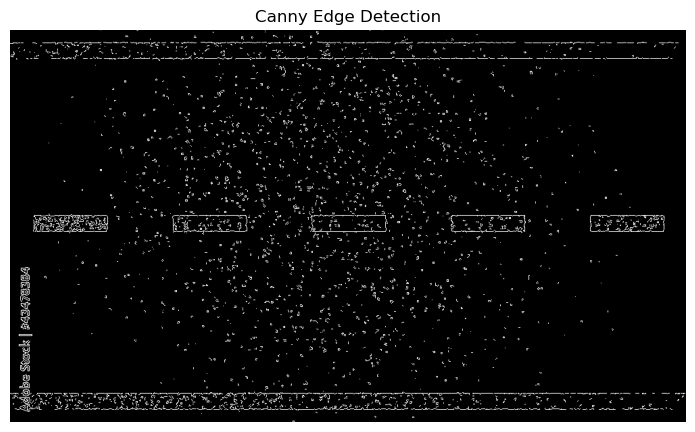

True

In [449]:
edges = cv.Canny(gray_street_img, 400, 550, L2gradient=True)
show(edges, "Canny Edge Detection")
cv.imwrite('01_output/canny_edges.jpg', edges)

#### Additional Experiment

Seems like applying Median blur first before Canny gives a better result

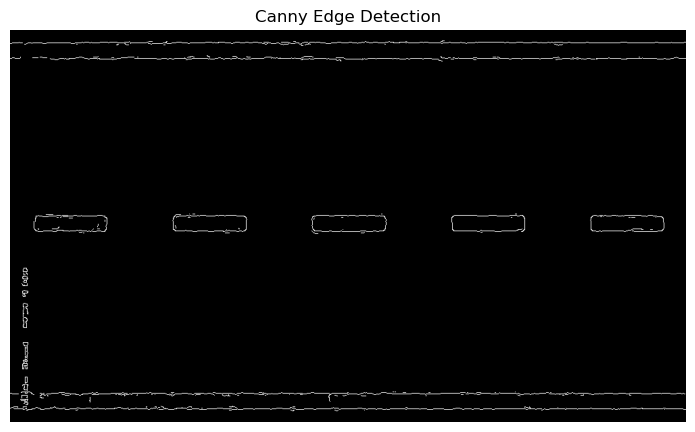

In [439]:
exp_img = cv.medianBlur(gray_street_img, 9)
exp_edges = cv.Canny(exp_img, 100, 130, L2gradient=True)
show(exp_edges, "Canny Edge Detection")

### 3-	Use Hough transform to detect lines in the above image. Implement a loop to increment the threshold and visualize the lines on the image for various threshold values. Paste the resulting images with lines for three different threshold values.

In [440]:
def hough_transform(threshold):
    cdst = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)
        
    lines = cv.HoughLines(edges, 1, np.pi / 180, threshold, None, 0, 0)

    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

    show(cdst, f"Detected Lines (in red) - Standard Hough Line Transform - Threshold: {threshold}")


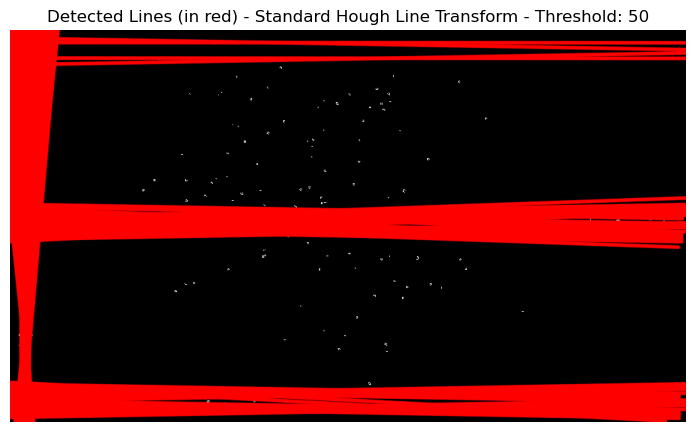

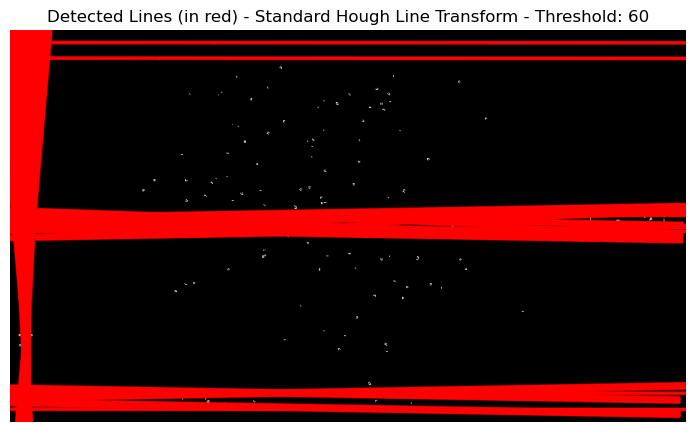

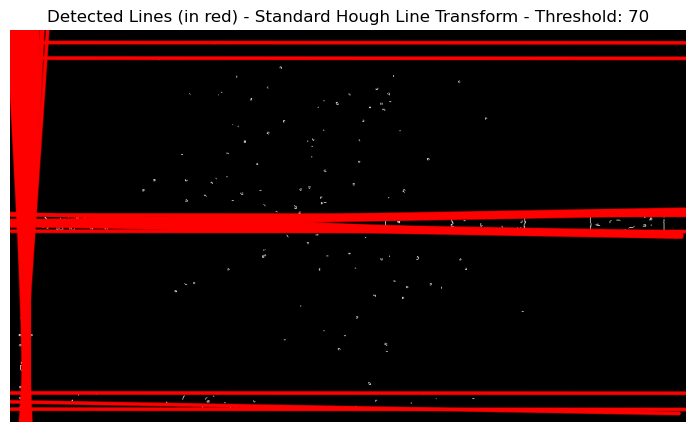

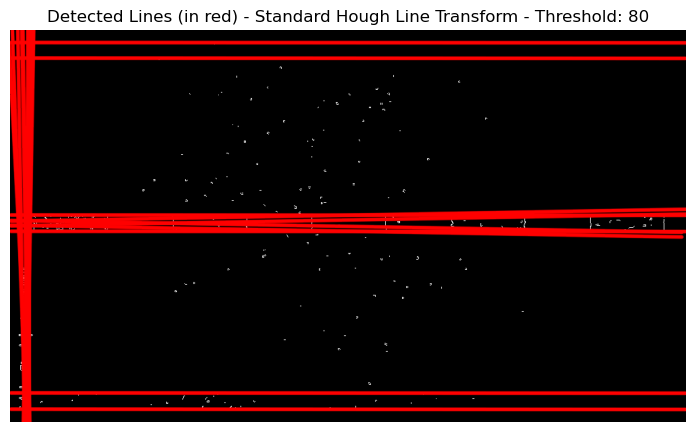

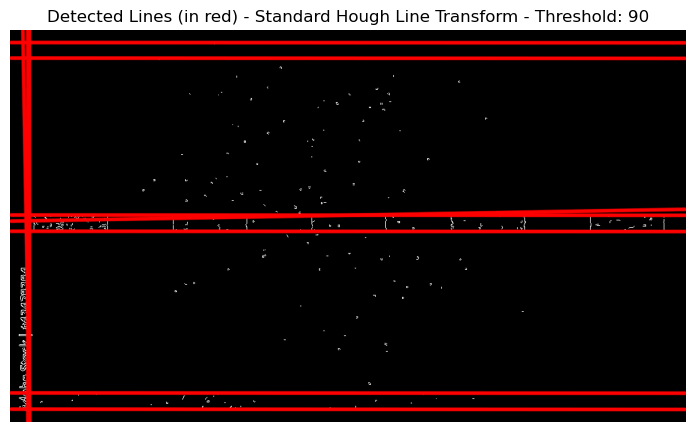

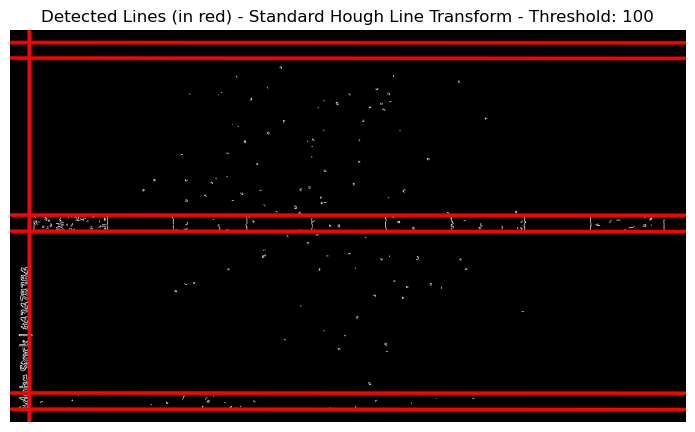

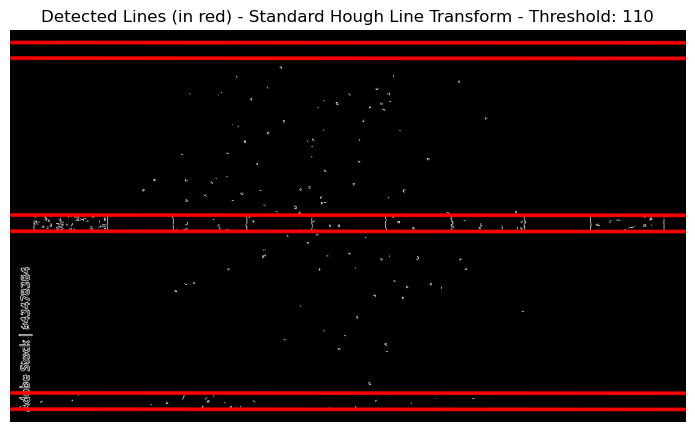

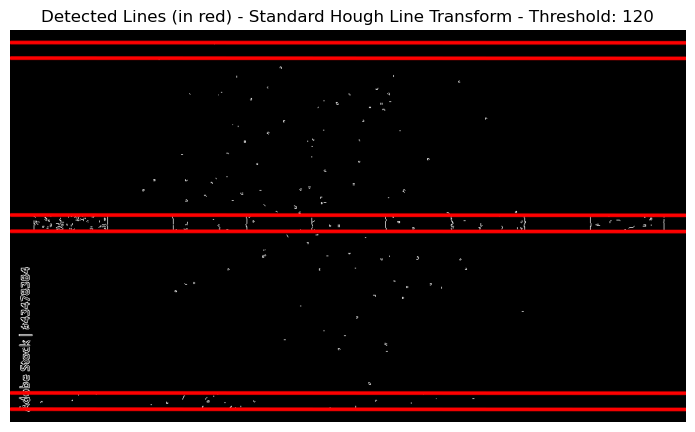

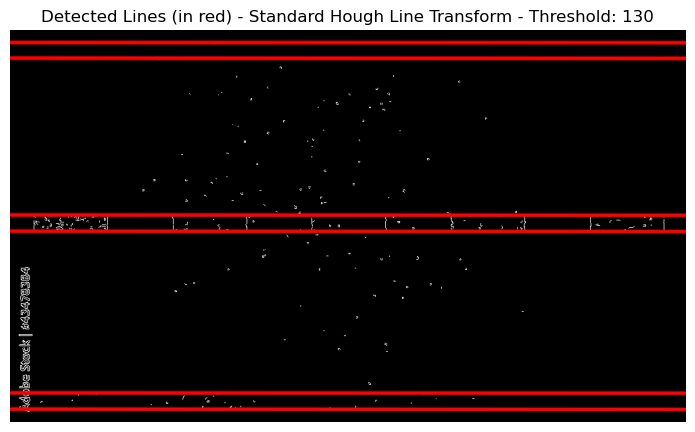

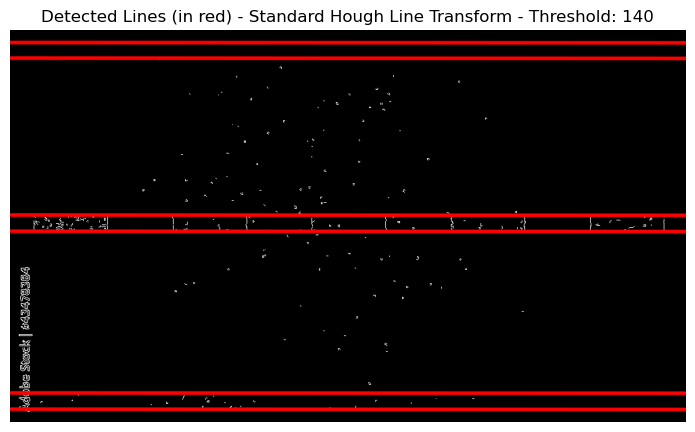

In [441]:
for i in range(50, 150, 10):
    hough_transform(i)

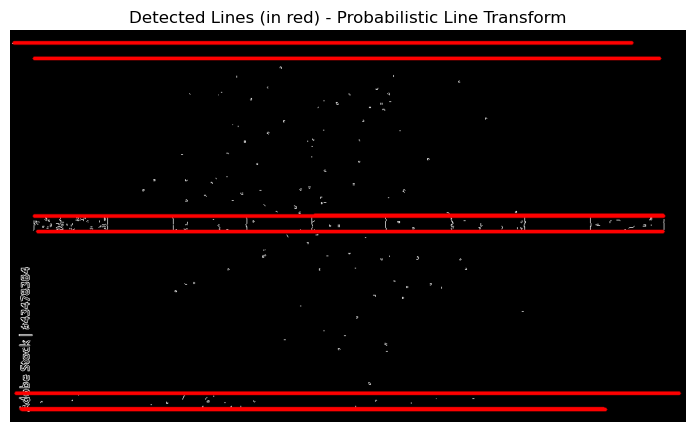

In [442]:
# probabilistic hough transform
cdstP = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)
linesP = cv.HoughLinesP(edges, 1, np.pi / 180, 110, None,  minLineLength=100, maxLineGap=99)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
show(cdstP, "Detected Lines (in red) - Probabilistic Line Transform")

### 4-	Explain what threshold does.

In the Hough transformation, each point is converted into a line in another space, and if two points in the original space can form a line, in the new space the corresponding lines will intersect. The number of lines going through an intersection (the point where the lines intersect in the new space) is called votes. The threshold is the minimal number of votes required to consider that the points in the original space form an edge. Thus, changing the threshold will change the number of edges detected.

### 5-	Use Hough transform to detect circles in the ‘Shapes.jpg’ image. Implement a loop to visualize the circles detected on the image for various values of minDist and maxRadius. Paste at least four of the resulting images with circles.

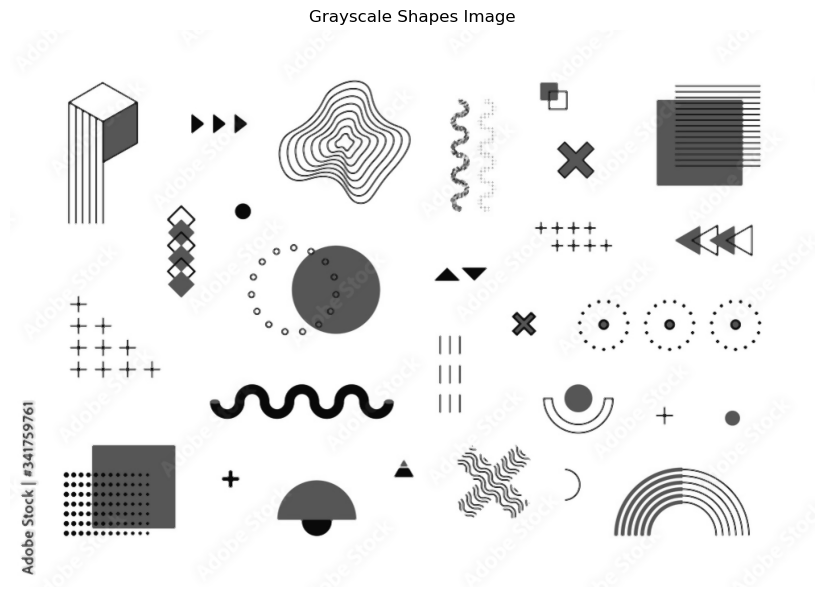

In [443]:
shapes_img = cv.imread('Assignment3_Files/Shapes.jpg')

assert shapes_img is not None, 'Image not found'

gray_shapes_img = cv.cvtColor(shapes_img, cv.COLOR_BGR2GRAY)
gray_shapes_img = cv.medianBlur(gray_shapes_img, 3)
# gray_shapes_img = cv.blur(gray_shapes_img, (3,3))
show(gray_shapes_img, "Grayscale Shapes Image")

#### Params:
- dp: inverse ratio of the accumulator resolution to the image resolution
- minDist: minimum distance between the centers of the detected circles
- param1: higher threshold for the Canny edge detector, lower threshold is half of this
- param2: accumulator threshold for the circle centers at the detection stage
- minRadius: minimum circle radius
- maxRadius: maximum circle radius

In [458]:
def hough_circle_transform(minDist, maxRadius):
    cdst = cv.cvtColor(gray_shapes_img, cv.COLOR_GRAY2BGR)

    circles = cv.HoughCircles(gray_shapes_img, cv.HOUGH_GRADIENT, dp=1, minDist=minDist, param1=50, param2=60, minRadius=0, maxRadius=maxRadius)

    assert circles is not None, 'No circles found'

    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv.circle(cdst,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv.circle(cdst,(i[0],i[1]),2,(0,0,255),3)

    show(cdst, f"Detected Circles - Params: minDist: {minDist}, maxRadius: {maxRadius}")



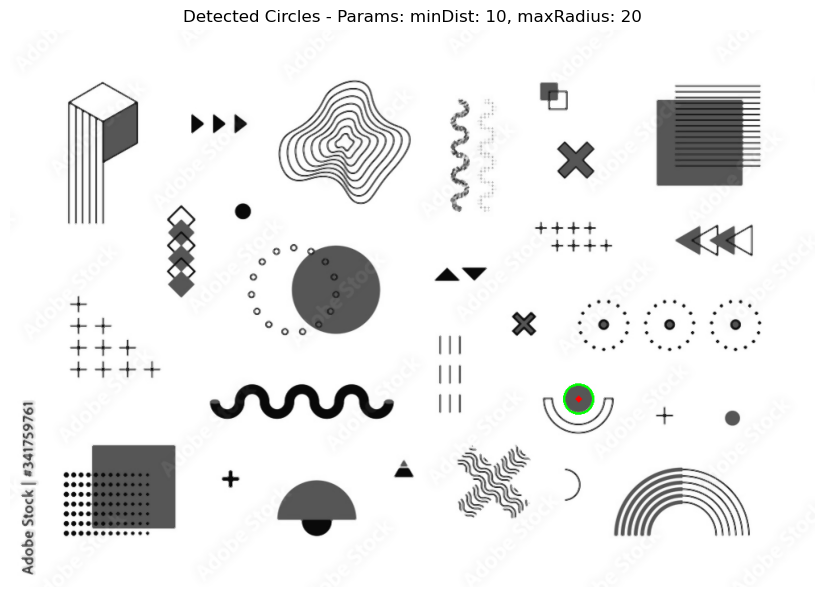

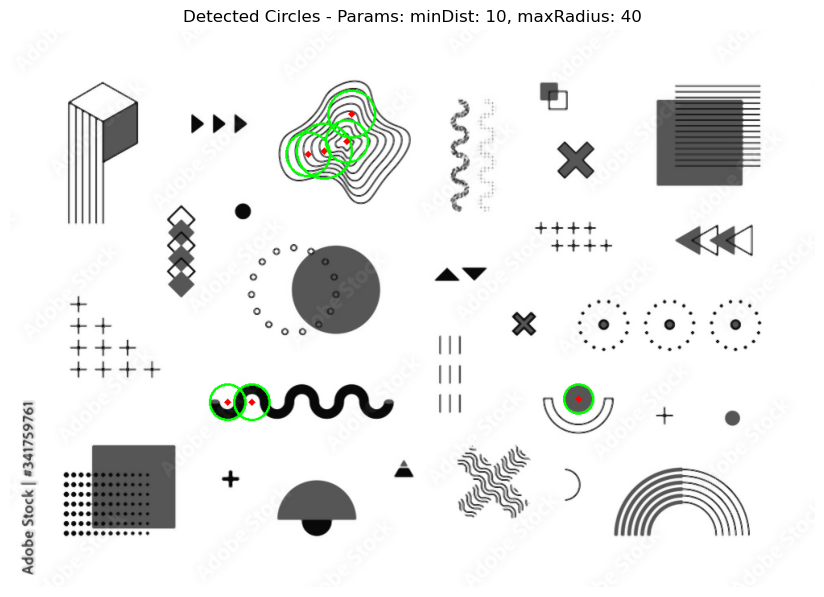

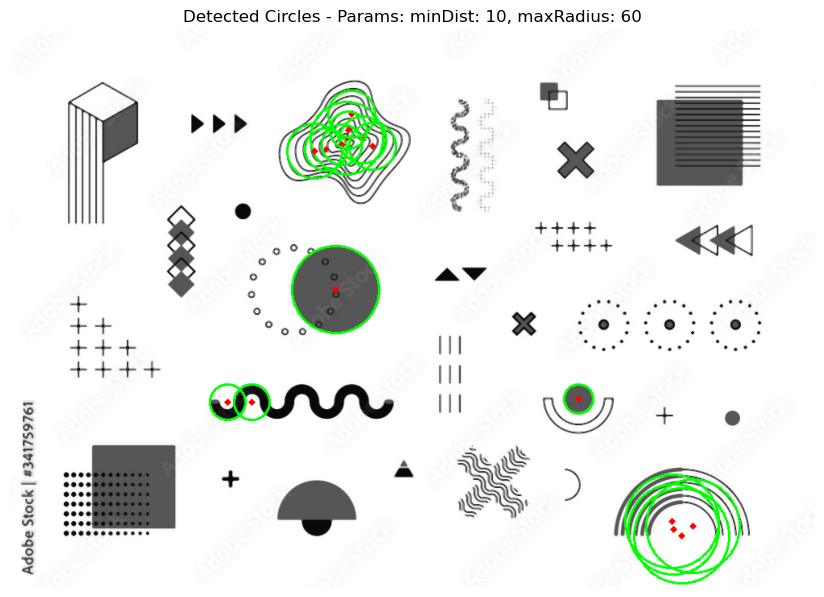

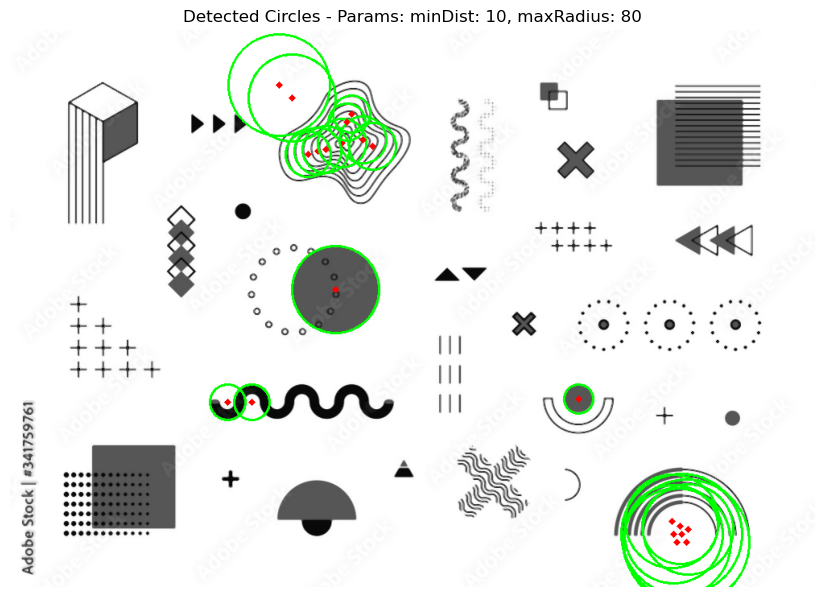

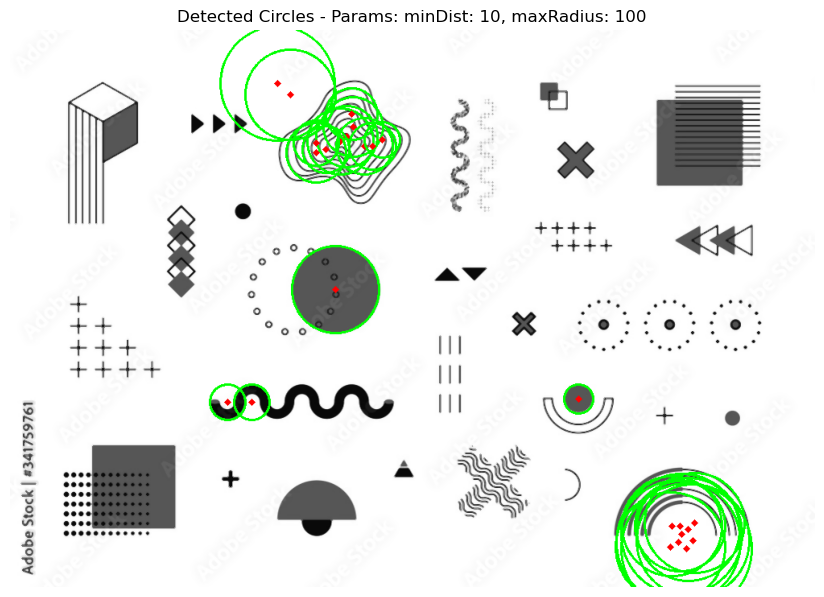

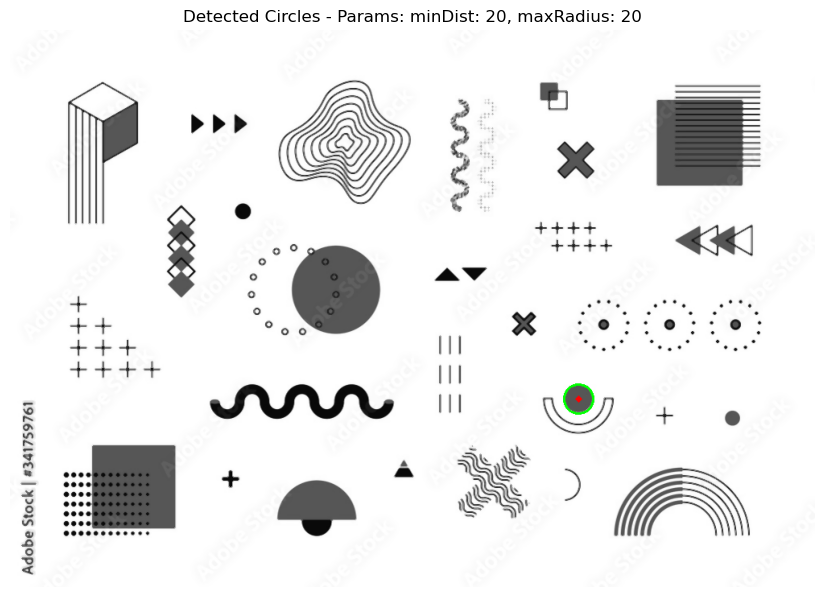

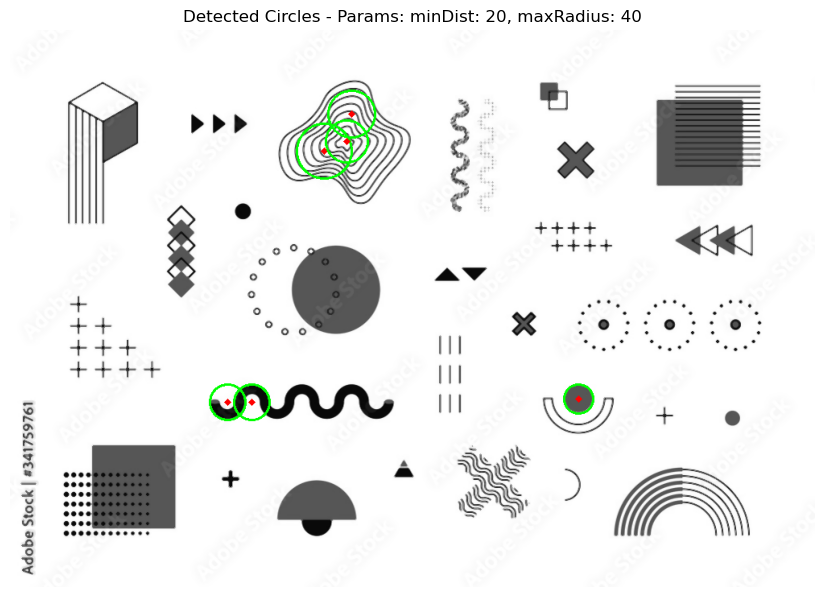

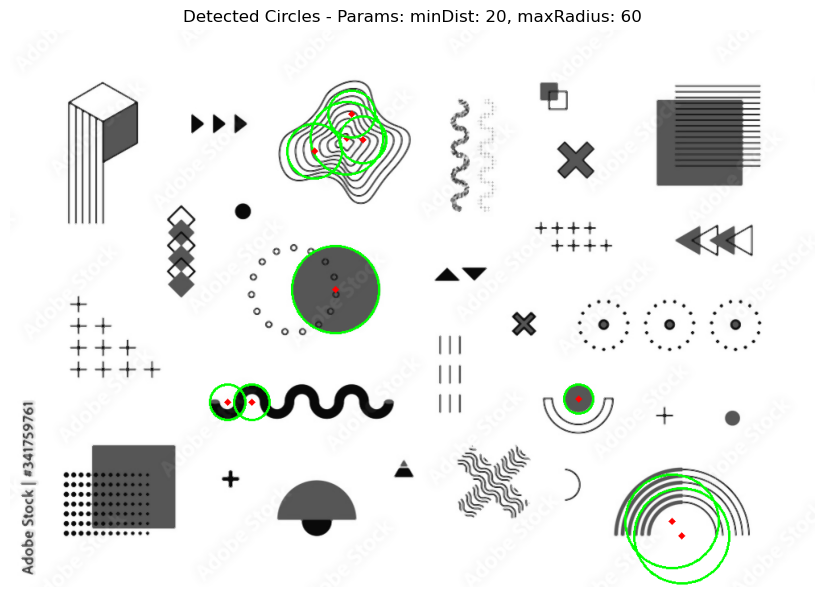

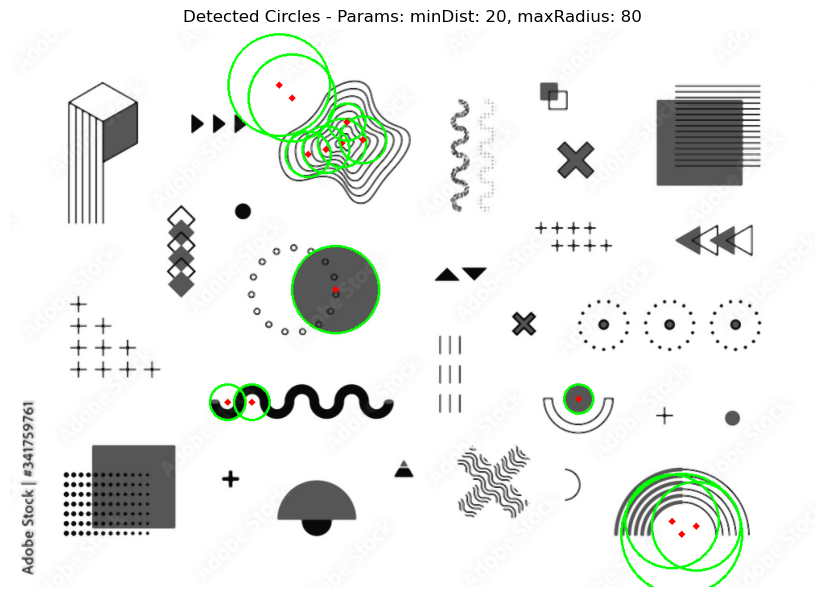

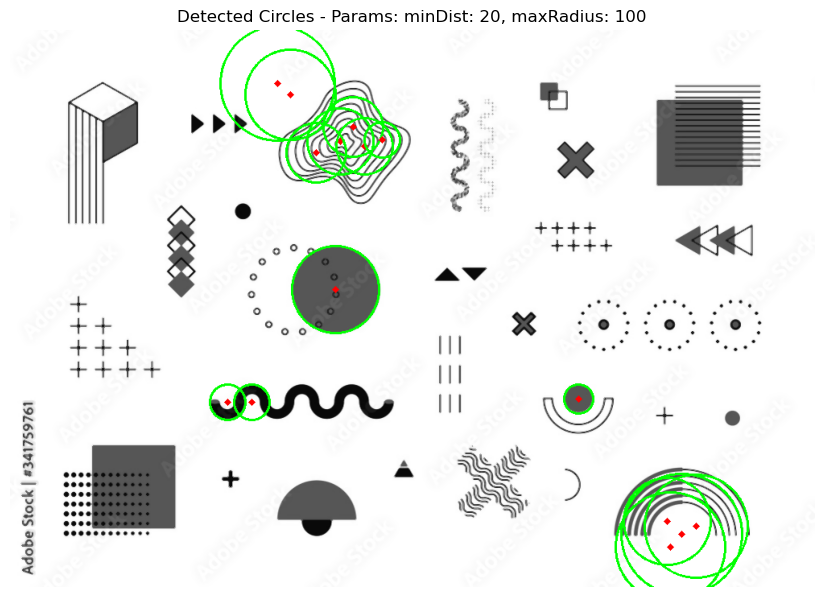

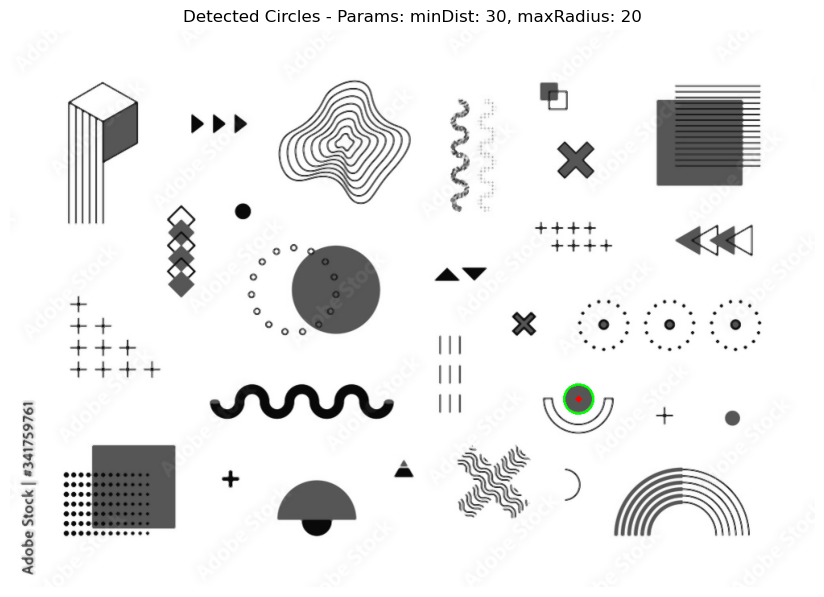

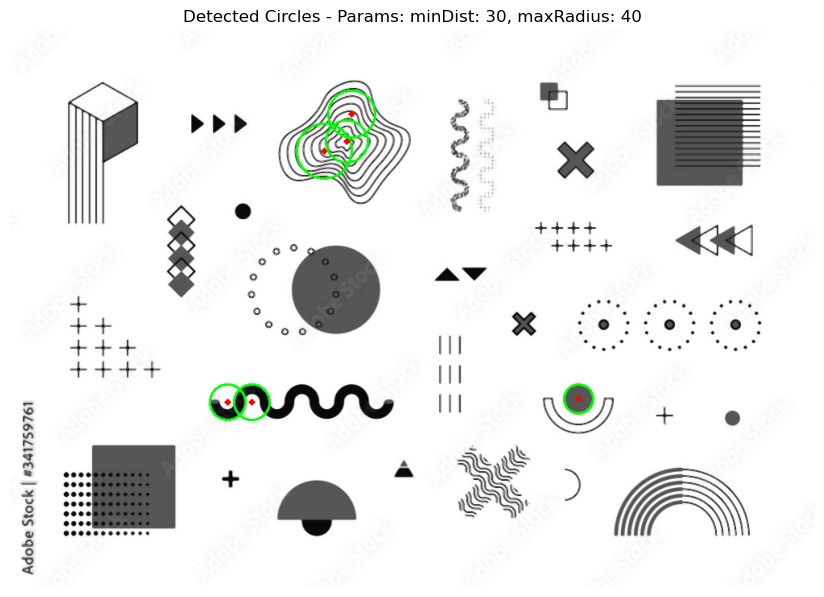

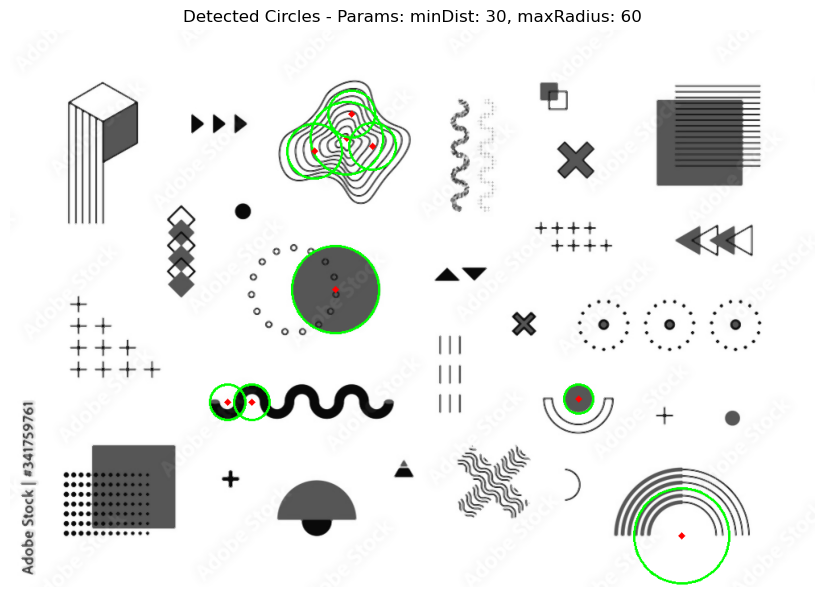

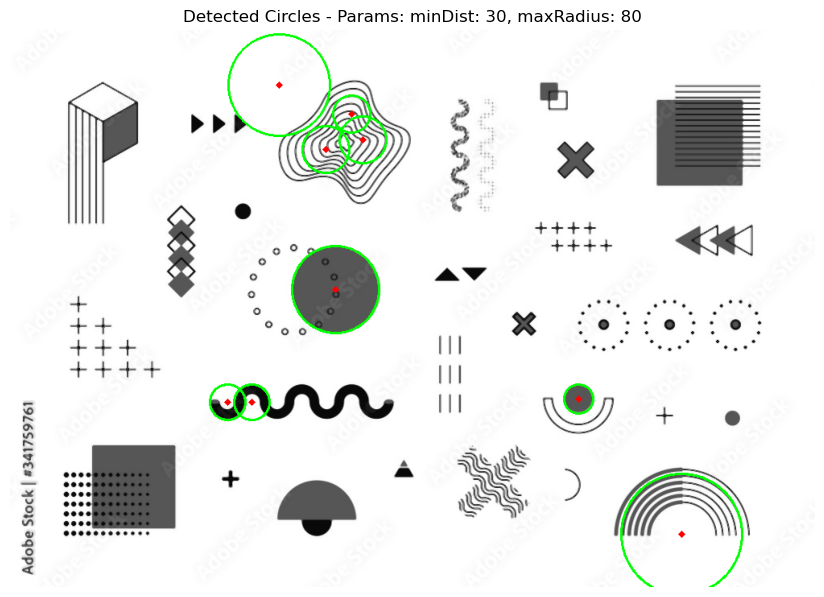

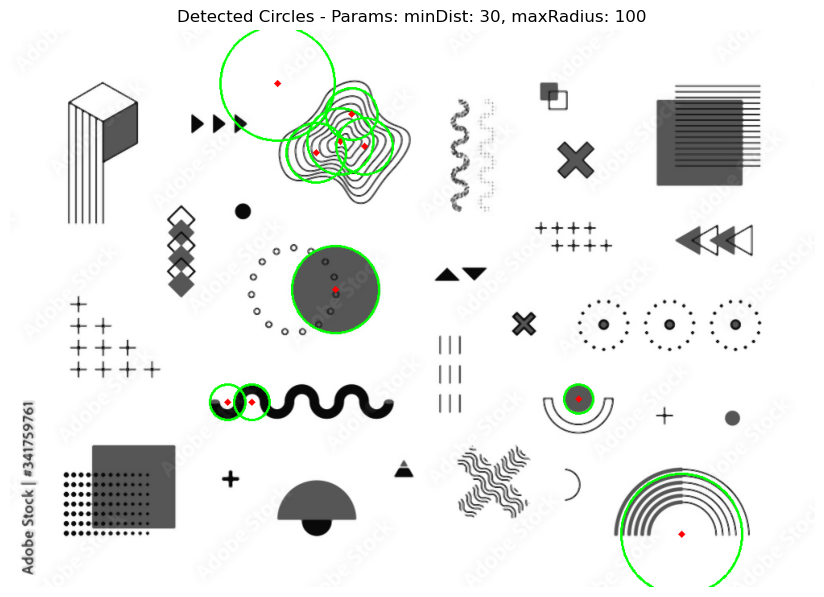

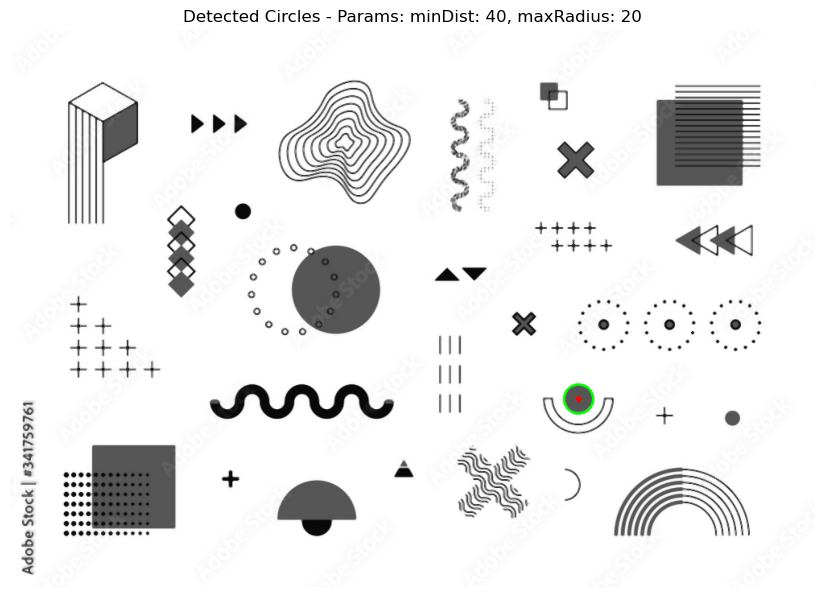

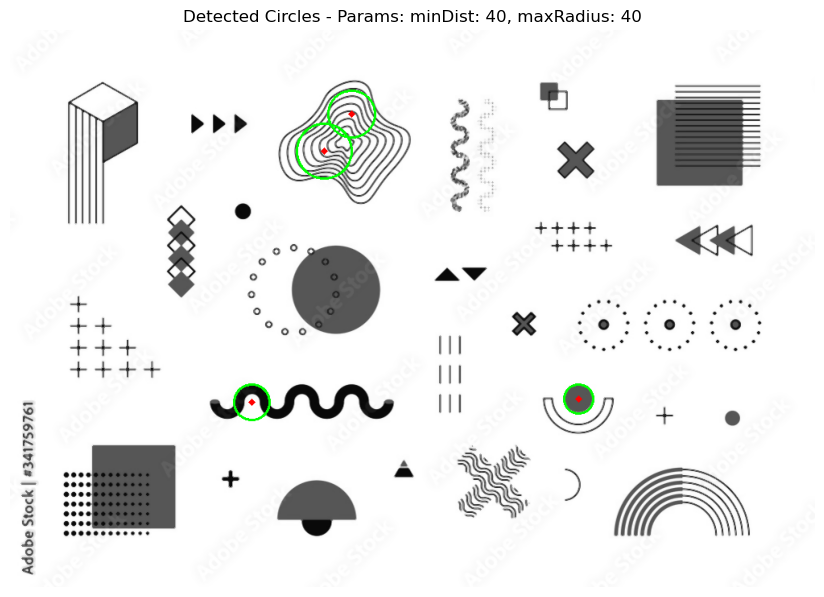

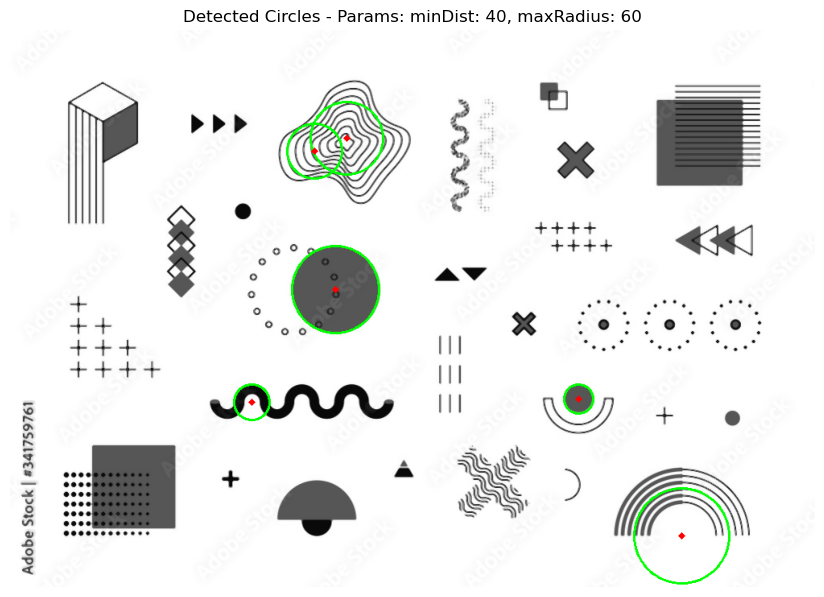

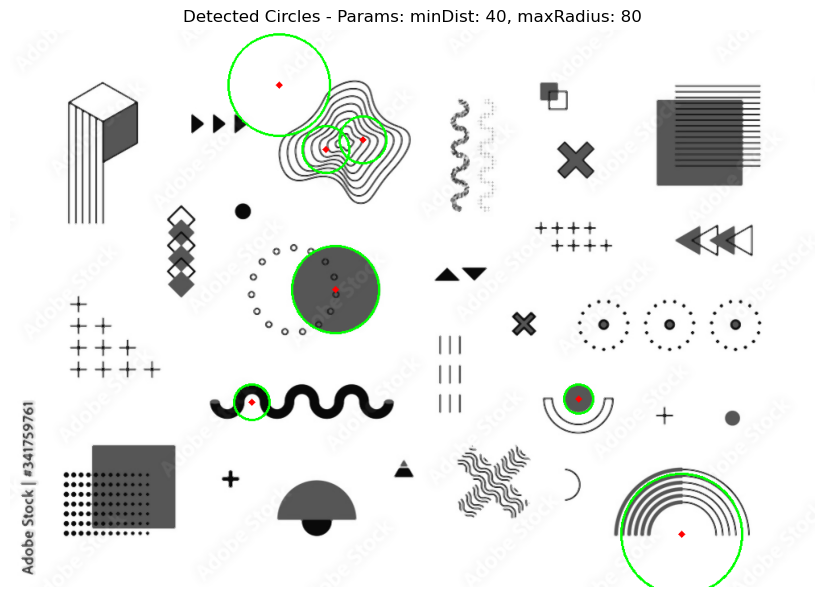

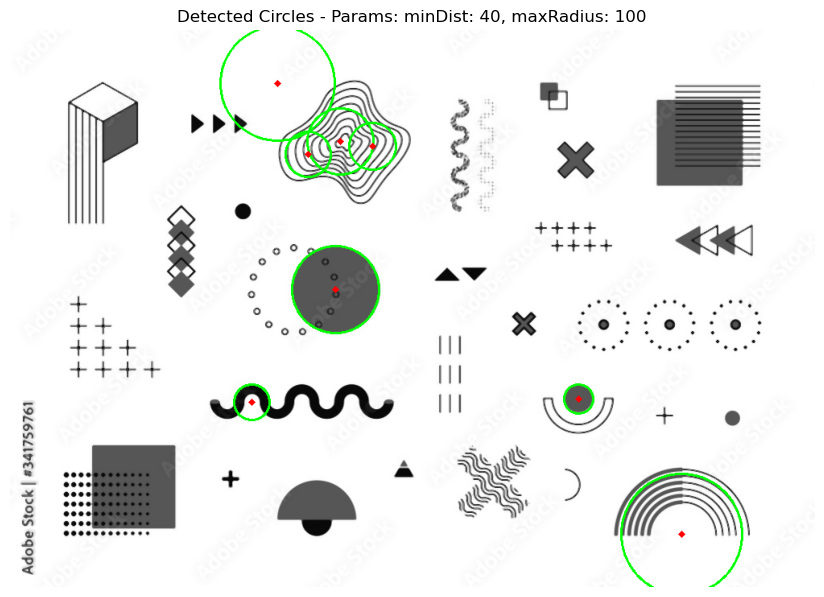

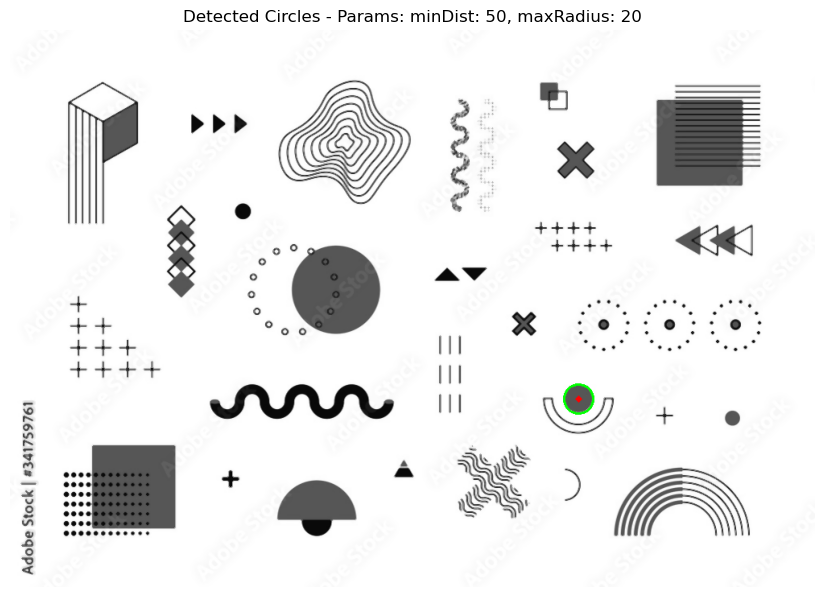

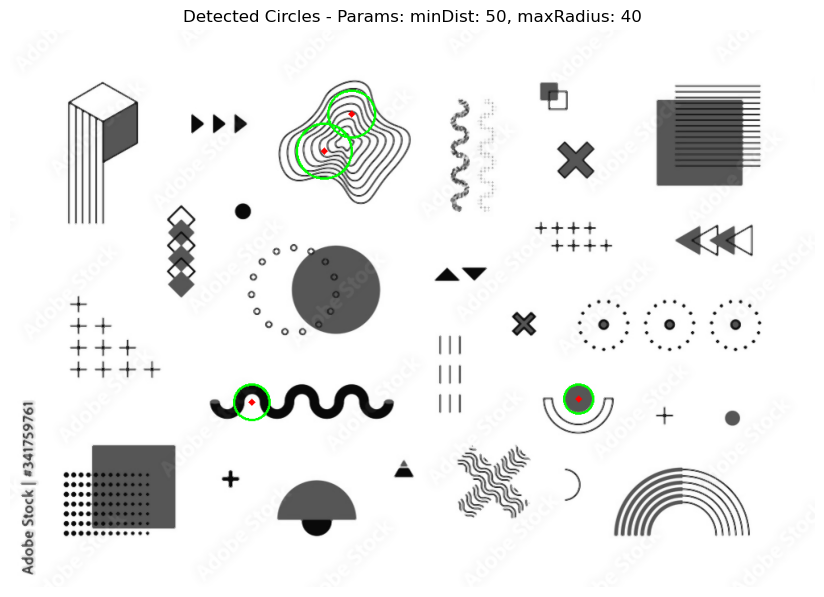

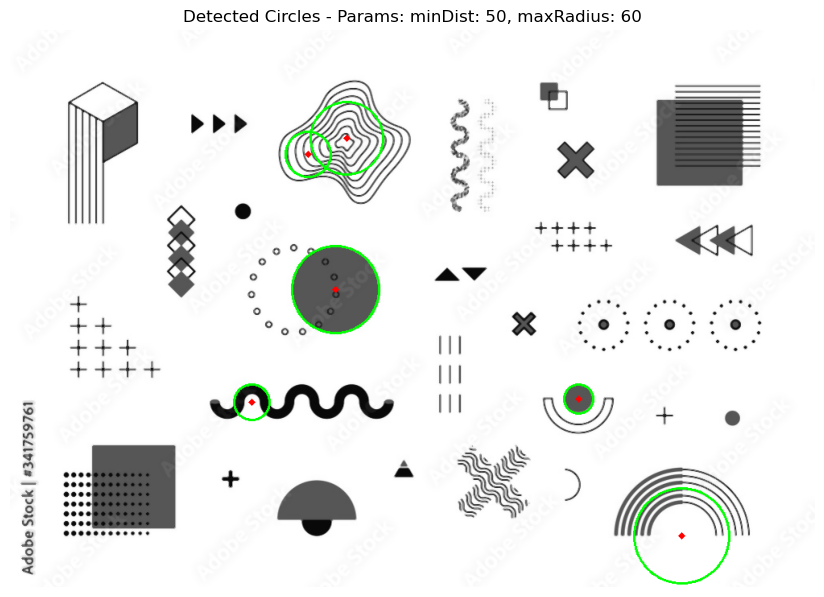

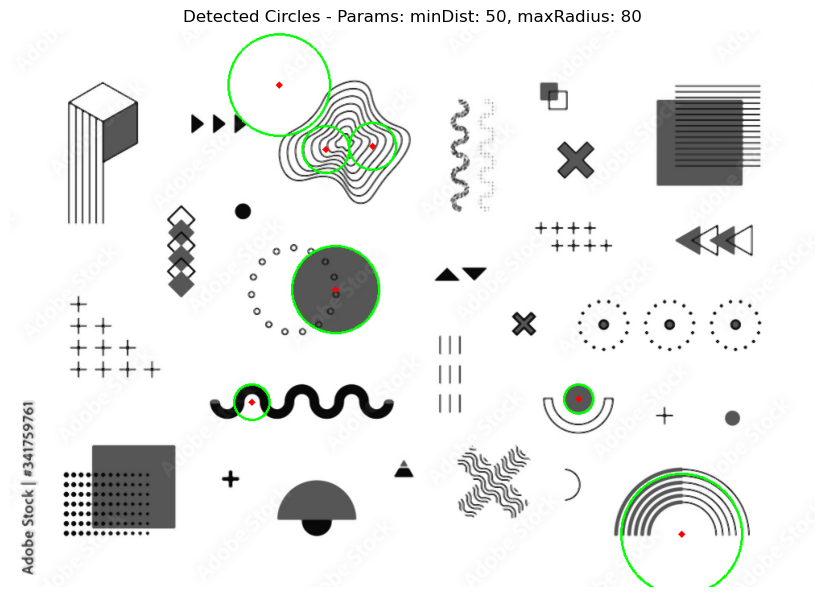

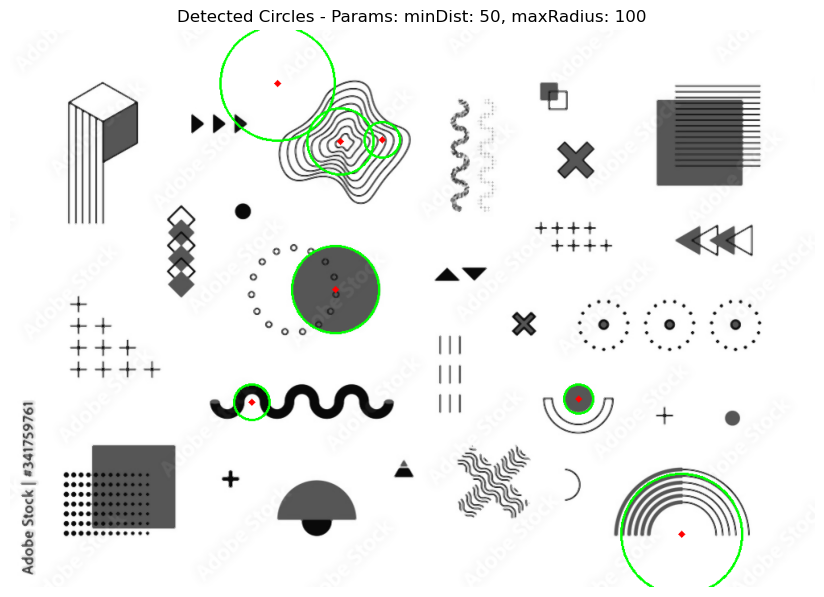

In [459]:
for minRadius in range(10, 60, 10):
    for maxRadius in range(20, 120, 20):
        hough_circle_transform(minRadius, maxRadius)


### 6 -	In your words, explain how would parameters in cv.HoughCircles() change the result? Choose 3 parameters for this part.

**miniDist**: it is the minimal distance between circles detected. If a shape has repeated circles such as the shape on the bottom right corner, using a small value of miniDist will result in multiple circles being detected. Increasing the miniDist value will reduce the circle detected in that local area.

**maxRadius**: it defines the maximum radius of the circle that can be detected. If the value is small, large circles will not be detected.

**param2**: param2 is like the threshold for the votes in the Hough Lines version. Increasing the threshold will increased the number of circles detected.
